In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('../dataset/concrete_data.csv')

In [4]:
seed = 1234
np.random.seed(seed)

# Univariate

In [73]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [74]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [75]:
df.isna().any(axis=0).sort_values(ascending=False)

cement                           False
blast_furnace_slag               False
fly_ash                          False
water                            False
superplasticizer                 False
coarse_aggregate                 False
fine_aggregate                   False
age                              False
concrete_compressive_strength    False
dtype: bool

### Outliers

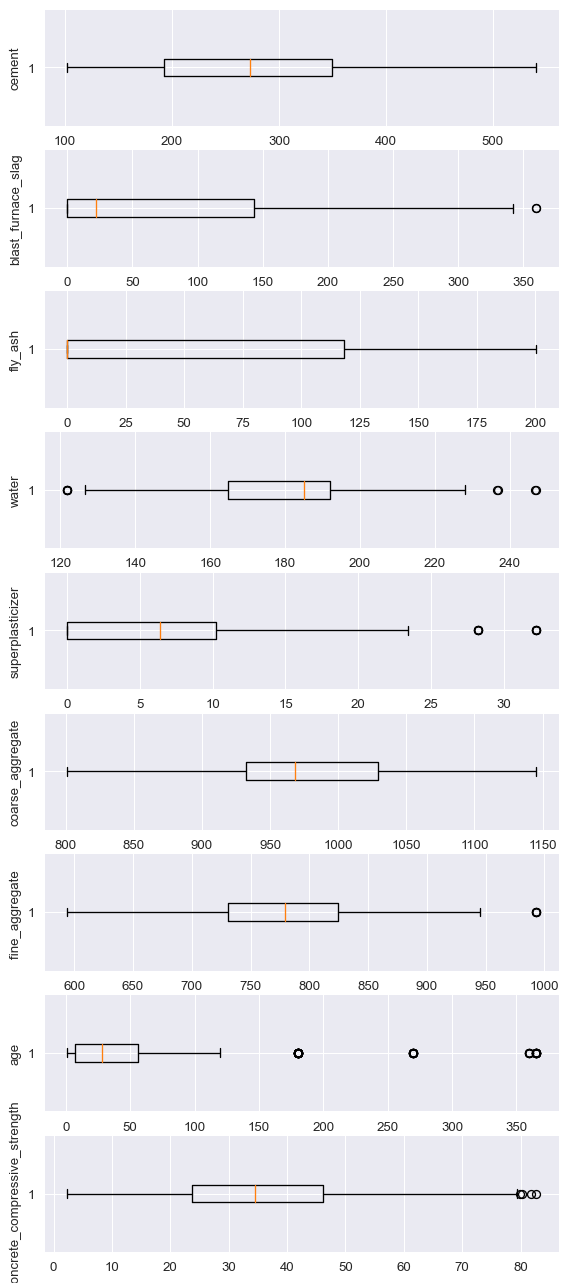

In [76]:
# Box Plots
fig, axs = plt.subplots(9,1, dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

# Multivariate

In [77]:
corr_mat_non_linear = df.corr(method='spearman')
corr_mat = df.corr(method='pearson')

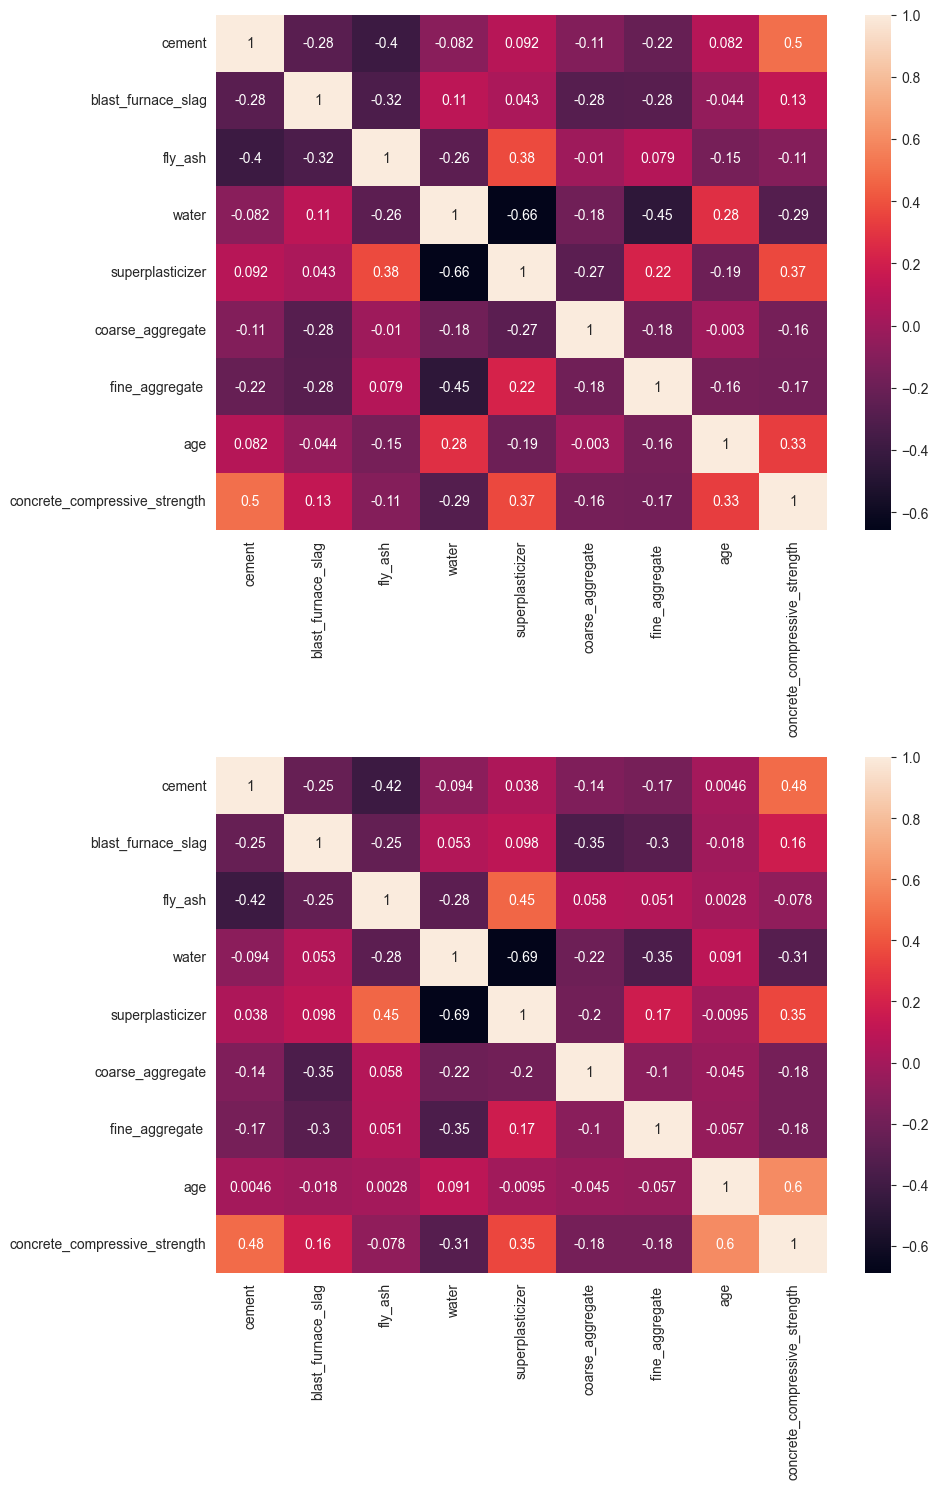

In [78]:
fig, ax = plt.subplots(2,1, figsize = (10,15))
sns.heatmap(corr_mat, ax=ax[0], annot=True)
sns.heatmap(corr_mat_non_linear, ax=ax[1], annot=True)
plt.tight_layout()
plt.show()

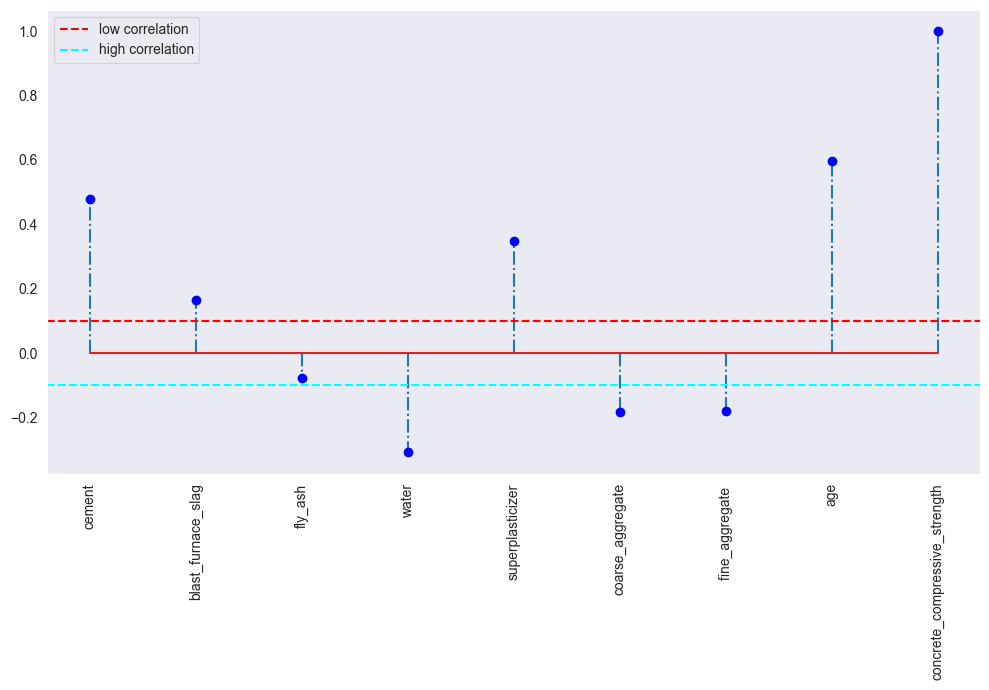

In [79]:
target_corr = corr_mat_non_linear['concrete_compressive_strength']

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.stem(list(df.columns), target_corr, linefmt='-.', markerfmt='bo')
ax.axhline(y=0.1, color='red', linestyle='--', label='low correlation')
ax.axhline(y=-0.1, color='cyan', linestyle='--', label='high correlation')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

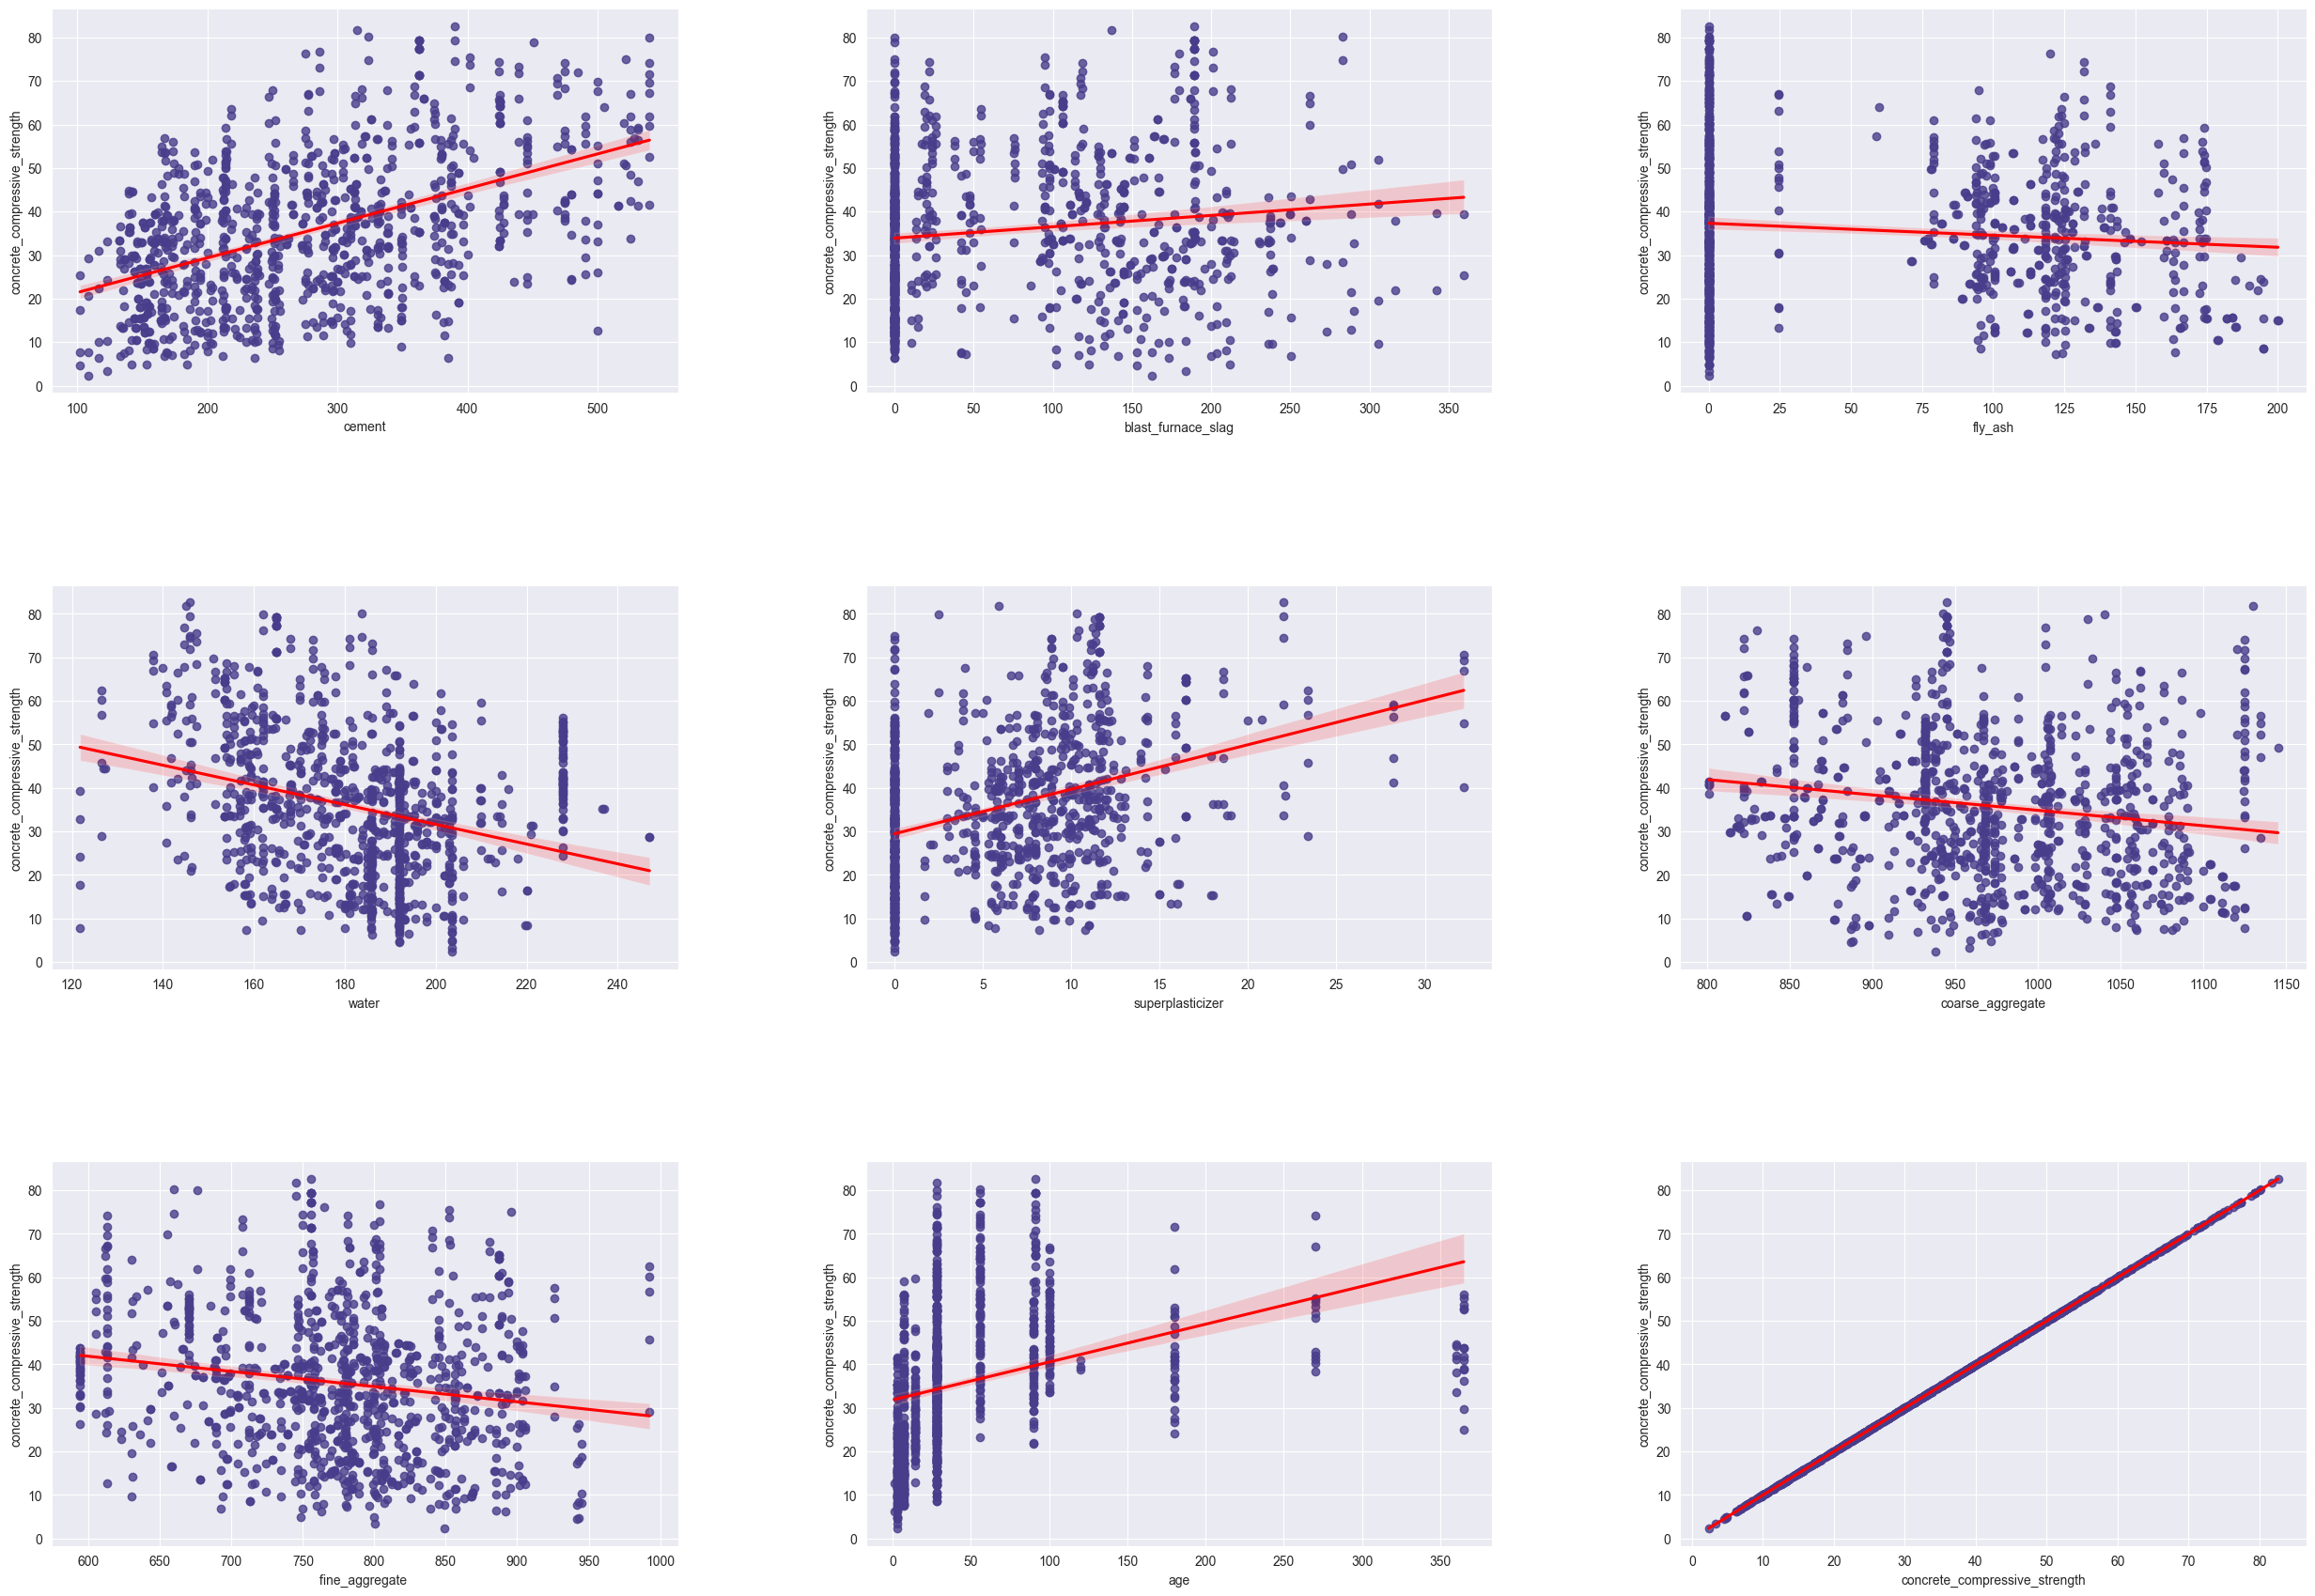

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.9, wspace=0.3, hspace=0.5)

for i, col in enumerate(df.columns):
    # Create a new subplot
    plt.subplot(15, 3, i + 1)
    sns.regplot(x=col, y="concrete_compressive_strength", data=df, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

plt.show()

# Feature importance

In [81]:
X = df.drop(columns=["concrete_compressive_strength"]).values
y = df["concrete_compressive_strength"].values

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

In [83]:
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

5.490447158991832
0.8851354373341692


In [40]:
feature_names = df.drop(columns=["concrete_compressive_strength"]).columns
sorted(zip(feature_names, reg.feature_importances_), key=lambda x: x[1], reverse=True)

[('age', 0.3294679334945805),
 ('cement', 0.3208240388388405),
 ('water', 0.1176630918187129),
 ('blast_furnace_slag', 0.07282757696319311),
 ('superplasticizer', 0.07066465816511815),
 ('fine_aggregate ', 0.0382926258469232),
 ('coarse_aggregate', 0.026685268306048344),
 ('fly_ash', 0.0235748065665834)]

### Try to delete less important features

In [41]:
X = df.drop(columns=["concrete_compressive_strength", "fly_ash", "coarse_aggregate"]).values
y = df["concrete_compressive_strength"].values

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

5.403008276712589
0.8896512234877525


In [44]:
feature_names = df.drop(columns=["concrete_compressive_strength", "fly_ash", "coarse_aggregate"]).columns
sorted(zip(feature_names, reg.feature_importances_), key=lambda x: x[1], reverse=True)

[('cement', 0.3359942014855553),
 ('age', 0.33123455332354856),
 ('water', 0.12247501772358364),
 ('blast_furnace_slag', 0.08650306793059828),
 ('superplasticizer', 0.07980825721229104),
 ('fine_aggregate ', 0.04398490232442321)]

# Remove outliers and study again the FI

In [89]:
# Identify the quartiles
q1, q3 = np.percentile(df['age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Identify the quartile 
q1, q3 = np.percentile(clean_data['blast_furnace_slag'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['blast_furnace_slag'] >= lower_bound) & (clean_data['blast_furnace_slag'] <= upper_bound)]

# Identify the quartile  
q1, q3 = np.percentile(clean_data['water'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['water'] >= lower_bound) & (clean_data['water'] <= upper_bound)]

# Identify the quartile  
q1, q3 = np.percentile(clean_data['superplasticizer'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['superplasticizer'] >= lower_bound) & (clean_data['superplasticizer'] <= upper_bound)]

df = clean_data

In [90]:
df.shape

(987, 9)

count    987.000000
mean      72.217933
std       86.080331
min        0.000000
25%        0.000000
50%       20.000000
75%      142.500000
max      342.100000
Name: blast_furnace_slag, dtype: float64


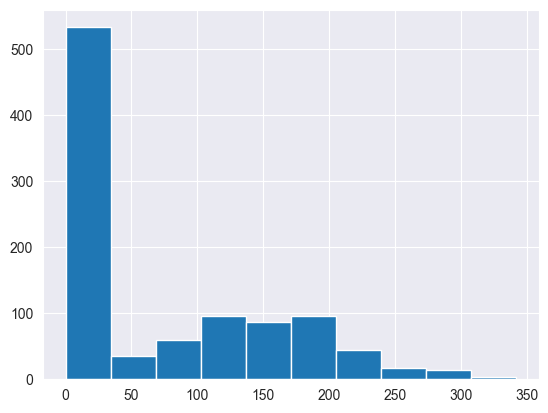

In [95]:
df['blast_furnace_slag'].hist()
print(df['blast_furnace_slag'].describe())

In [54]:
X = df.drop(columns=["concrete_compressive_strength"]).values
y = df["concrete_compressive_strength"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

4.967826664981275
0.9068670660806136


# Normalize data

In [67]:
df.shape

(1030, 9)

In [5]:
scaler = MinMaxScaler(feature_range=(-1, 1))
rescaledX = scaler.fit_transform(df)
df_rescaled = pd.DataFrame(rescaledX, columns=df.columns)

# Print the transformed DataFrame
df_rescaled.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1.000000,-1.000000,-1.0,-0.357827,-0.84472,0.389535,-0.588560,-0.851648,0.934969
1,1.000000,-1.000000,-1.0,-0.357827,-0.84472,0.476744,-0.588560,-0.851648,0.483992
2,0.052511,-0.207012,-1.0,0.696486,-1.00000,-0.238372,-1.000000,0.478022,-0.054690
3,0.052511,-0.207012,-1.0,0.696486,-1.00000,-0.238372,-1.000000,1.000000,-0.035256
4,-0.558904,-0.263216,-1.0,0.121406,-1.00000,0.031395,0.161565,0.972527,0.045721


In [6]:
X = df_rescaled.drop(columns=["concrete_compressive_strength"]).values
y = df_rescaled["concrete_compressive_strength"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=seed, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, shuffle=True, random_state=seed, test_size=1/3)
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)
'''
Without outliers:
RMSE: 0.12581881198778974
ADJ-R2: 0.9057977338317024
'''

0.11891380202653838
0.9158745024765973


'\nWithout outliers:\nRMSE: 0.12581881198778974\nADJ-R2: 0.9057977338317024\n'

In [70]:
df_rescaled.to_csv('dataset_with_outliers.csv', index=False)

# PCA
- fly ash non serve

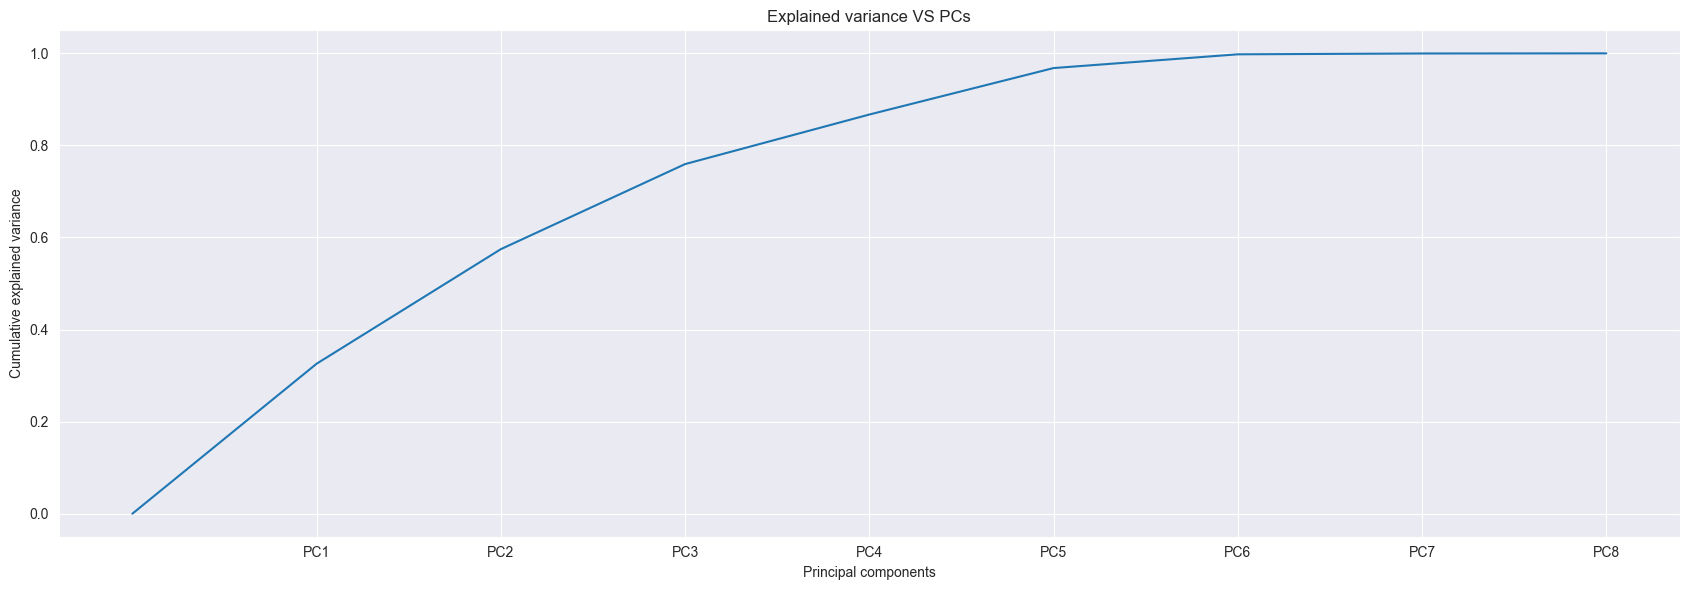

In [7]:
X = df.drop(columns=["concrete_compressive_strength"]).values

pca_1 = PCA(random_state = 42)
pca_1.fit(X)

_, ax = plt.subplots(1,1, figsize = (17,6))
ax.plot(np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0))
ax.set_title('Explained variance VS PCs')
plt.xticks(ticks=np.arange(1, pca_1.n_features_in_ + 1),
           labels=[f'PC{i}' for i in range(1, pca_1.n_features_in_ + 1)])
ax.set_xlabel('Principal components')
ax.set_ylabel('Cumulative explained variance')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

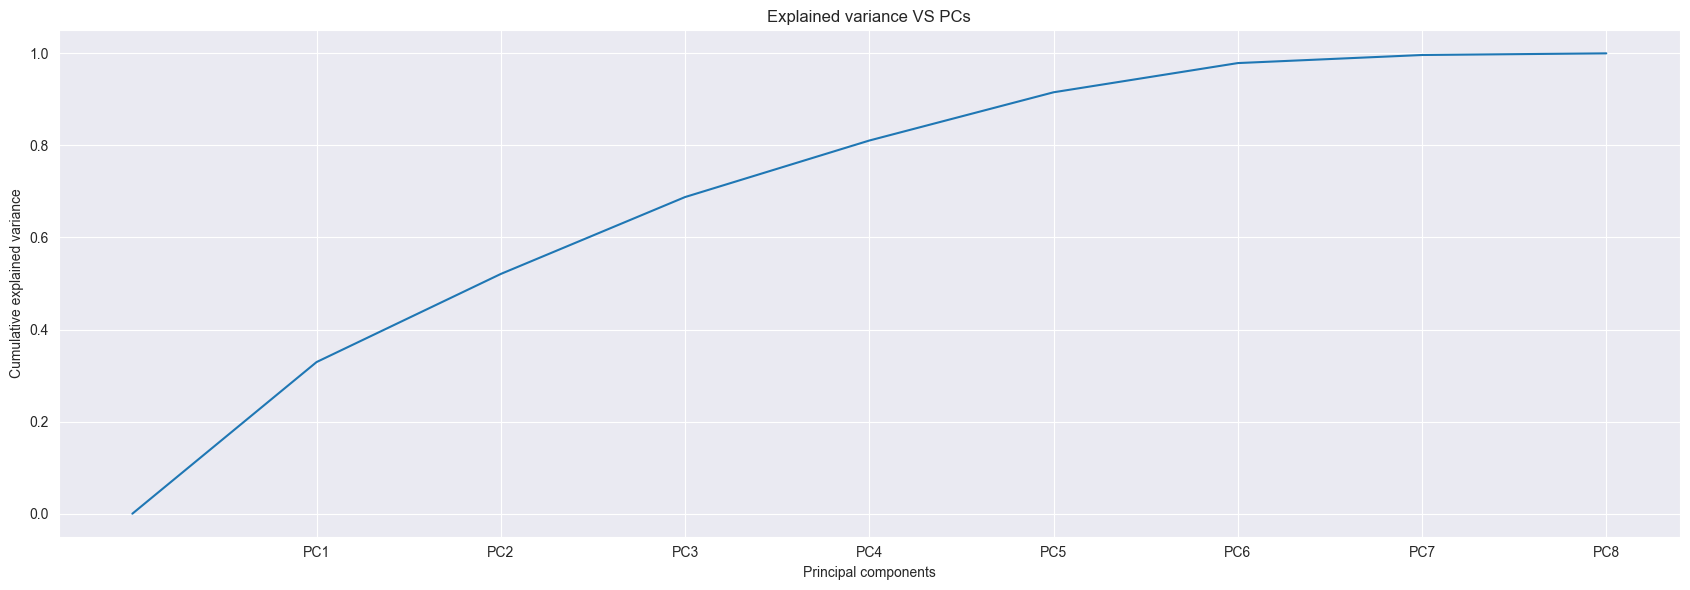

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))
rescaledX = scaler.fit_transform(df)
df_rescaled = pd.DataFrame(rescaledX, columns=df.columns)

X = df_rescaled.drop(columns=["concrete_compressive_strength"]).values

pca_1 = PCA(random_state = 42)
pca_1.fit(X)

_, ax = plt.subplots(1,1, figsize = (17,6))
ax.plot(np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0))
ax.set_title('Explained variance VS PCs')
plt.xticks(ticks=np.arange(1, pca_1.n_features_in_ + 1),
           labels=[f'PC{i}' for i in range(1, pca_1.n_features_in_ + 1)])
ax.set_xlabel('Principal components')
ax.set_ylabel('Cumulative explained variance')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

### Try FI without "fly ash" and with normalization

In [9]:
df_rescaled = df_rescaled.drop(columns=["fly_ash"])

X = df_rescaled.drop(columns=["concrete_compressive_strength"]).values
y = df_rescaled["concrete_compressive_strength"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=seed, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, shuffle=True, random_state=seed, test_size=1/3)
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

0.11837061178909336
0.9175187662583988


### Try FI without "fly ash", with normalization and without outliers

In [10]:
# Identify the quartiles
q1, q3 = np.percentile(df_rescaled['age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df_rescaled[(df_rescaled['age'] >= lower_bound) & (df_rescaled['age'] <= upper_bound)]

# Identify the quartile 
q1, q3 = np.percentile(clean_data['blast_furnace_slag'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['blast_furnace_slag'] >= lower_bound) & (clean_data['blast_furnace_slag'] <= upper_bound)]

# Identify the quartile  
q1, q3 = np.percentile(clean_data['water'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['water'] >= lower_bound) & (clean_data['water'] <= upper_bound)]

# Identify the quartile  
q1, q3 = np.percentile(clean_data['superplasticizer'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['superplasticizer'] >= lower_bound) & (clean_data['superplasticizer'] <= upper_bound)]

df_rescaled_clean = clean_data

In [11]:
df_rescaled_clean.shape

(930, 8)

In [12]:
X = df_rescaled_clean.drop(columns=["concrete_compressive_strength"]).values
y = df_rescaled_clean["concrete_compressive_strength"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=seed, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, shuffle=True, random_state=seed, test_size=1/3)
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)
rms = mean_squared_error(y_valid, reg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, reg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

0.14427065425070218
0.869341303989446


In [160]:
df_rescaled_clean.to_csv('dataset_without_outliers_without_feature.csv', index=False)

In [162]:
df_rescaled.to_csv('dataset_with_outliers_without_feature.csv', index=False)

# Delete duplicate rows

In [140]:
print(df_rescaled.shape)
df_rescaled.drop_duplicates().shapea

(1030, 8)


(1005, 8)

In [141]:
df_rescaled.head()

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1.000000,-1.000000,-0.357827,-0.84472,0.389535,-0.588560,-0.851648,0.934969
1,1.000000,-1.000000,-0.357827,-0.84472,0.476744,-0.588560,-0.851648,0.483992
2,0.052511,-0.207012,0.696486,-1.00000,-0.238372,-1.000000,0.478022,-0.054690
3,0.052511,-0.207012,0.696486,-1.00000,-0.238372,-1.000000,1.000000,-0.035256
4,-0.558904,-0.263216,0.121406,-1.00000,0.031395,0.161565,0.972527,0.045721


In [144]:
print(df.shape)
print(df.drop_duplicates().shape)

(1030, 9)
(1005, 9)


In [146]:
df.drop_duplicates()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [154]:
df.query("concrete_compressive_strength == 9.74 & cement == 154.8")

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
984,154.8,0.0,142.8,193.3,9.1,877.2,867.7,28,9.74
